ЗАДАНИЕ №2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def abm_path_generator(n_paths, n_steps, T, kappa, theta, sigma, X_0):

    # Create 
    Z = np.random.normal(0.0, 1.0, [n_paths, n_steps])
    X = np.zeros([n_paths, n_steps + 1])
    time = np.zeros(n_steps + 1)
    
    X[:, 0] = X_0
    dt = T / float(n_steps)

    for k in range(0, n_steps):
        X[:, k+1] = X[:, k]*np.exp(-kappa*dt) + theta*(1-np.exp(-kappa*dt)) + sigma*np.sqrt((np.exp(2*kappa*dt)-1)/2*kappa*np.exp(2*kappa*dt)) * Z[:, k]
        time[k+1] = time[k] + dt
    
    paths = {'X': X, 'time': time}

    return paths

In [13]:
def main_calculation():
    n_paths = 25
    n_steps = 500
    T = 1
  
    sigma = 40
    kappa = 1
    theta = 90
    X_0 = 100

    paths = abm_path_generator(n_paths, n_steps, T, kappa, theta, sigma, X_0)
    ABM = paths['X']
    time_grid = paths['time']

    plt.figure(figsize = (10, 6))
    plt.plot(time_grid, np.transpose(ABM))
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('X(t)')

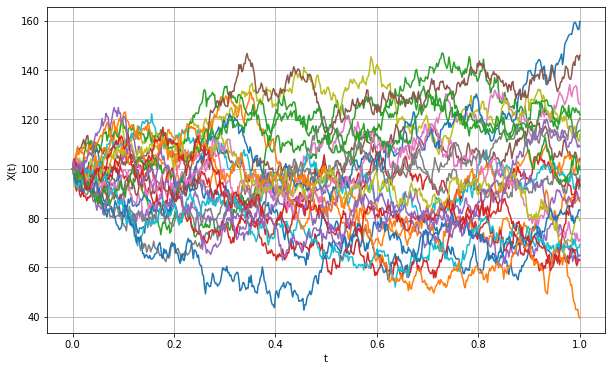

In [16]:
main_calculation()

Попробуем поменять значения параметров kappa, theta и sigma и посмотреть на результат изменения графиков симуляции Монте-Карло

Для разных Kappa: 10 и 50

Text(0, 0.5, 'X(t)')

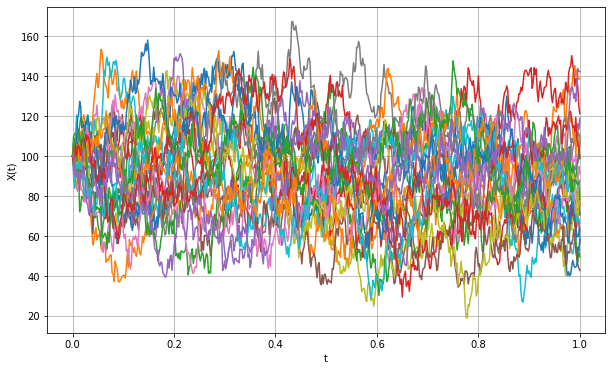

In [32]:
paths = abm_path_generator(25, 500, 1, 10, 90, 10, 100)
ABM = paths['X']
time_grid = paths['time']

plt.figure(figsize = (10, 6))
plt.plot(time_grid, np.transpose(ABM))
plt.grid()
plt.xlabel('t')
plt.ylabel('X(t)')

Text(0, 0.5, 'X(t)')

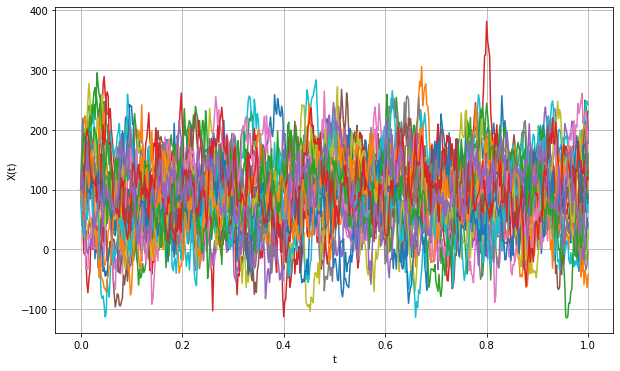

In [33]:
paths = abm_path_generator(25, 500, 1, 50, 90, 10, 100)
ABM = paths['X']
time_grid = paths['time']

plt.figure(figsize = (10, 6))
plt.plot(time_grid, np.transpose(ABM))
plt.grid()
plt.xlabel('t')
plt.ylabel('X(t)')

Text(0, 0.5, 'X(t)')

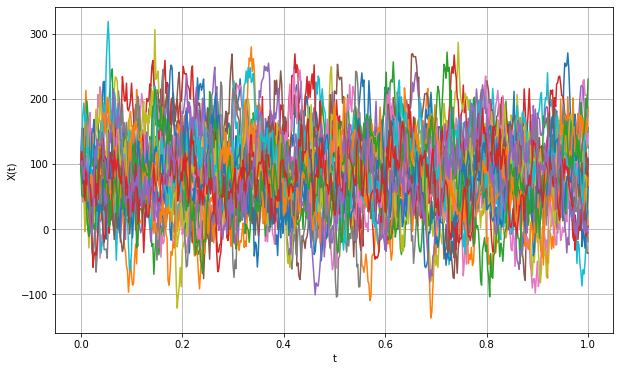

In [26]:
paths = abm_path_generator(25, 500, 1, 50, 90, 10, 100)
ABM = paths['X']
time_grid = paths['time']

plt.figure(figsize = (10, 6))
plt.plot(time_grid, np.transpose(ABM))
plt.grid()
plt.xlabel('t')
plt.ylabel('X(t)')

Для theta: 120 и 20

Text(0, 0.5, 'X(t)')

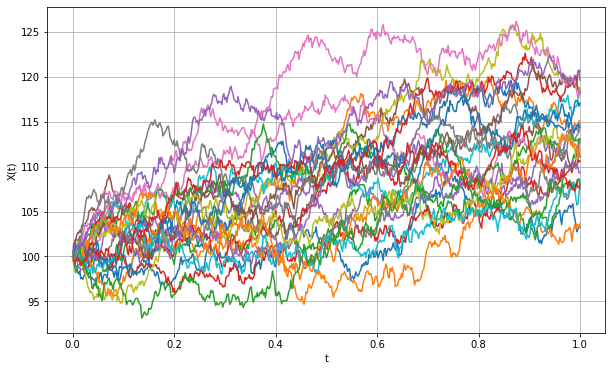

In [25]:
paths = abm_path_generator(25, 500, 1, 1, 120, 10, 100)
ABM = paths['X']
time_grid = paths['time']

plt.figure(figsize = (10, 6))
plt.plot(time_grid, np.transpose(ABM))
plt.grid()
plt.xlabel('t')
plt.ylabel('X(t)')

Text(0, 0.5, 'X(t)')

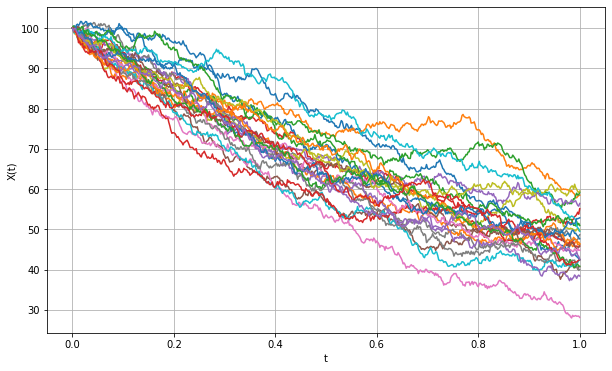

In [24]:
paths = abm_path_generator(25, 500, 1, 1, 20, 10, 100)
ABM = paths['X']
time_grid = paths['time']

plt.figure(figsize = (10, 6))
plt.plot(time_grid, np.transpose(ABM))
plt.grid()
plt.xlabel('t')
plt.ylabel('X(t)')

Для sigma: 50 и 10

Text(0, 0.5, 'X(t)')

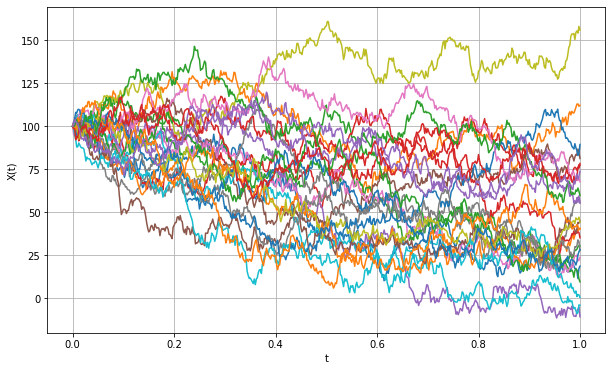

In [29]:
paths = abm_path_generator(25, 500, 1, 1, 20, 50, 100)
ABM = paths['X']
time_grid = paths['time']

plt.figure(figsize = (10, 6))
plt.plot(time_grid, np.transpose(ABM))
plt.grid()
plt.xlabel('t')
plt.ylabel('X(t)')

Text(0, 0.5, 'X(t)')

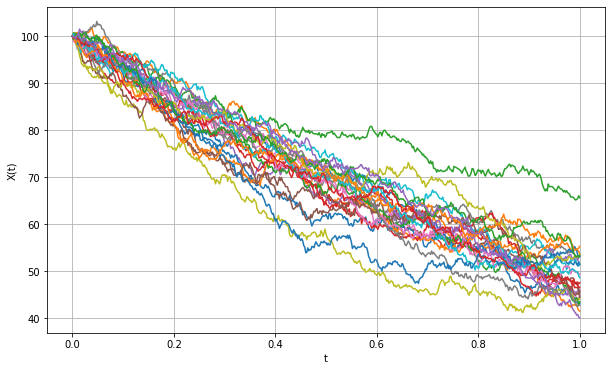

In [31]:
paths = abm_path_generator(25, 500, 1, 1, 20, 10, 100)
ABM = paths['X']
time_grid = paths['time']

plt.figure(figsize = (10, 6))
plt.plot(time_grid, np.transpose(ABM))
plt.grid()
plt.xlabel('t')
plt.ylabel('X(t)')

ЗАДАНИЕ №3

In [41]:
def gbm_path_generator(n_paths, n_steps, T, r, sigma, S_0):

    # Create 
    Z = np.random.normal(0.0, 1.0, [n_paths, n_steps])
    X = np.zeros([n_paths, n_steps + 1])
    time = np.zeros(n_steps + 1)
    
    X[:, 0] = np.log(S_0)
    dt = T / float(n_steps)

    for k in range(0, n_steps):
        X[:, k+1] = X[:, k] + (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, k]
        time[k+1] = time[k] + dt
    
    S = np.exp(X)
    paths = {'S': S, 'time': time}

    return paths

Text(0, 0.5, 'S(t)')

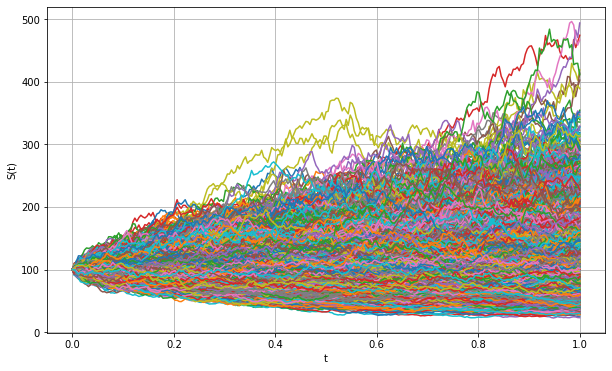

In [42]:
paths = gbm_path_generator(10000, 252, 1, 0.1, 0.4, 100)
GBM = paths['S']
time_grid = paths['time']

plt.figure(figsize = (10, 6))
plt.plot(time_grid, np.transpose(GBM))
plt.grid()
plt.xlabel('t')
plt.ylabel('S(t)')

In [43]:
#Подсчет цены опциона:
n_paths = 10000
n_steps = 252
T = 1
r = 0.1
sigma = 0.4
S_0 = 100
K = 110

data = paths['S'][:,-1]
price = np.exp(-r*T) * np.mean(np.maximum(data-K, 0))
print(price)

16.08198965313264
